In [22]:
import pyfolio as pf
import datetime
start=datetime.datetime(2019,1,1)
stock_rets = pf.utils.get_symbol_rets('FB',start)
pf.create_returns_tear_sheet(stock_rets)



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: register_return_func and get_symbol_rets are deprecated and will be removed in a future version.
  after removing the cwd from sys.path.


ImmediateDeprecationError: 
Google finance has been immediately deprecated due to large breaks in the API without the
introduction of a stable replacement. Pull Requests to re-enable these data
connectors are welcome.

See https://github.com/pydata/pandas-datareader/issues


In [ ]:
import pandas_datareader as pdr

In [23]:
import datetime
import pandas as pd


In [81]:
start = pd.to_datetime('2018-09-01')
aapl = pdr.get_data_yahoo('AAPL' , start=start)

In [108]:

import numpy as np
daily_close=aapl['Close']
# daily_close=daily_close[15:] 
# 17: not work

# daily_close.pct_change()

Start date,2018-09-01
End date,2019-01-10
Total months,6
,Backtest
Annual return,-35.5%
Cumulative returns,-20.5%
Annual volatility,36.3%
Sharpe ratio,-1.02
Calmar ratio,-0.92
Stability,0.65
Max drawdown,-38.7%


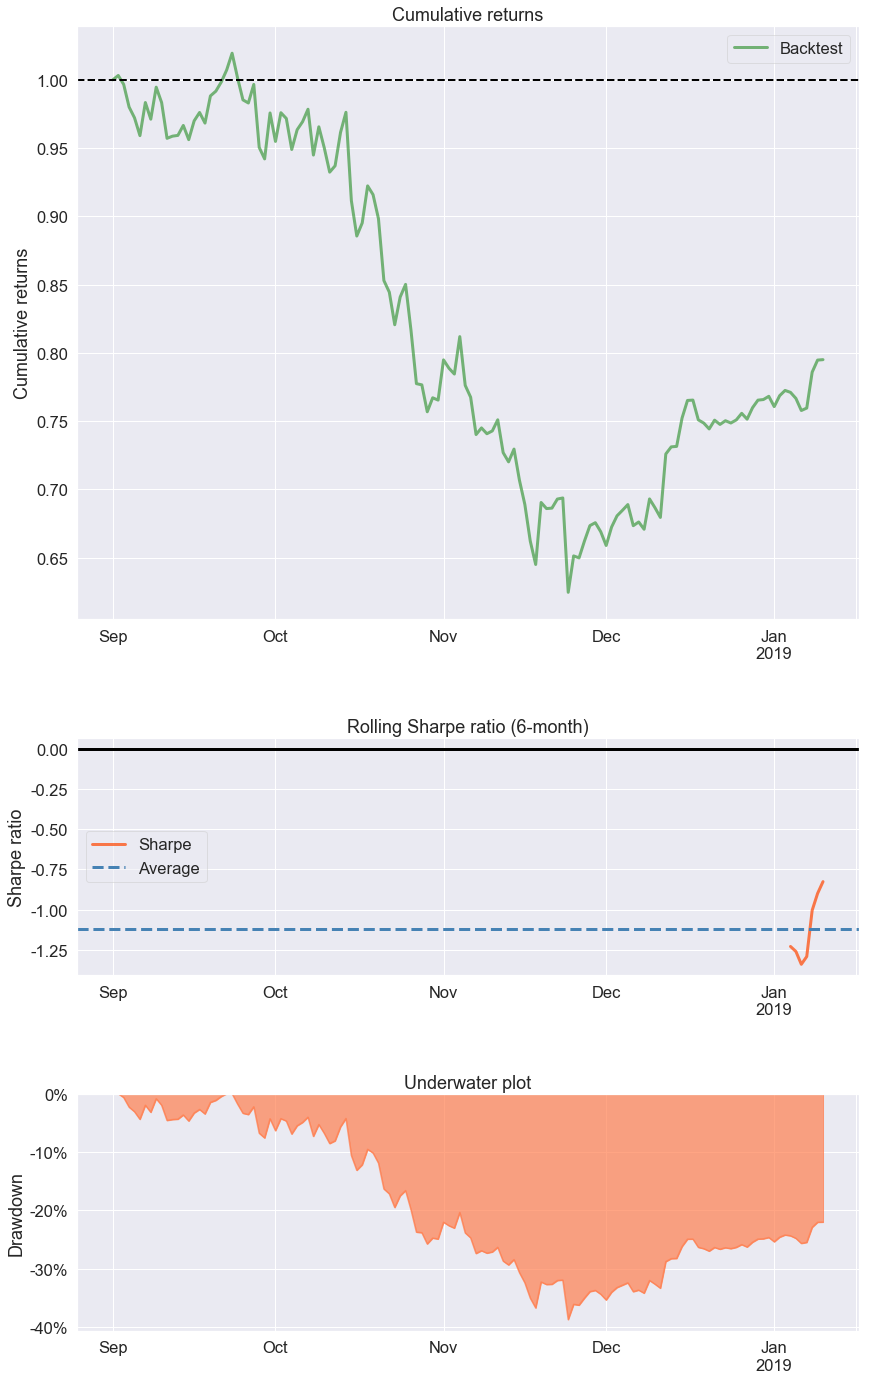

In [109]:
index = pd.date_range('9/1/2018', periods=len(daily_close.values), freq='1D',tz='Asia/Hong_Kong')
d=pd.Series(daily_close.values, index=index)
daily_pct_change = d.pct_change()
daily_pct_change.fillna(0, inplace=True)
daily_pct_change
pf.create_simple_tear_sheet(daily_pct_change)

Start date,2018-09-01
End date,2019-01-10
Total months,6
,Backtest
Annual return,-35.5%
Cumulative returns,-20.5%
Annual volatility,36.3%
Sharpe ratio,-1.02
Calmar ratio,-0.92
Stability,0.65
Max drawdown,-38.7%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,38.73,2018-09-23,2018-11-24,NaT,NaN
1,4.69,2018-09-02,2018-09-15,2018-09-22,15
2,0.00,2018-09-01,2018-09-01,2018-09-01,0
3,0.00,2018-09-01,2018-09-01,2018-09-01,0
4,0.00,2018-09-01,2018-09-01,2018-09-01,0


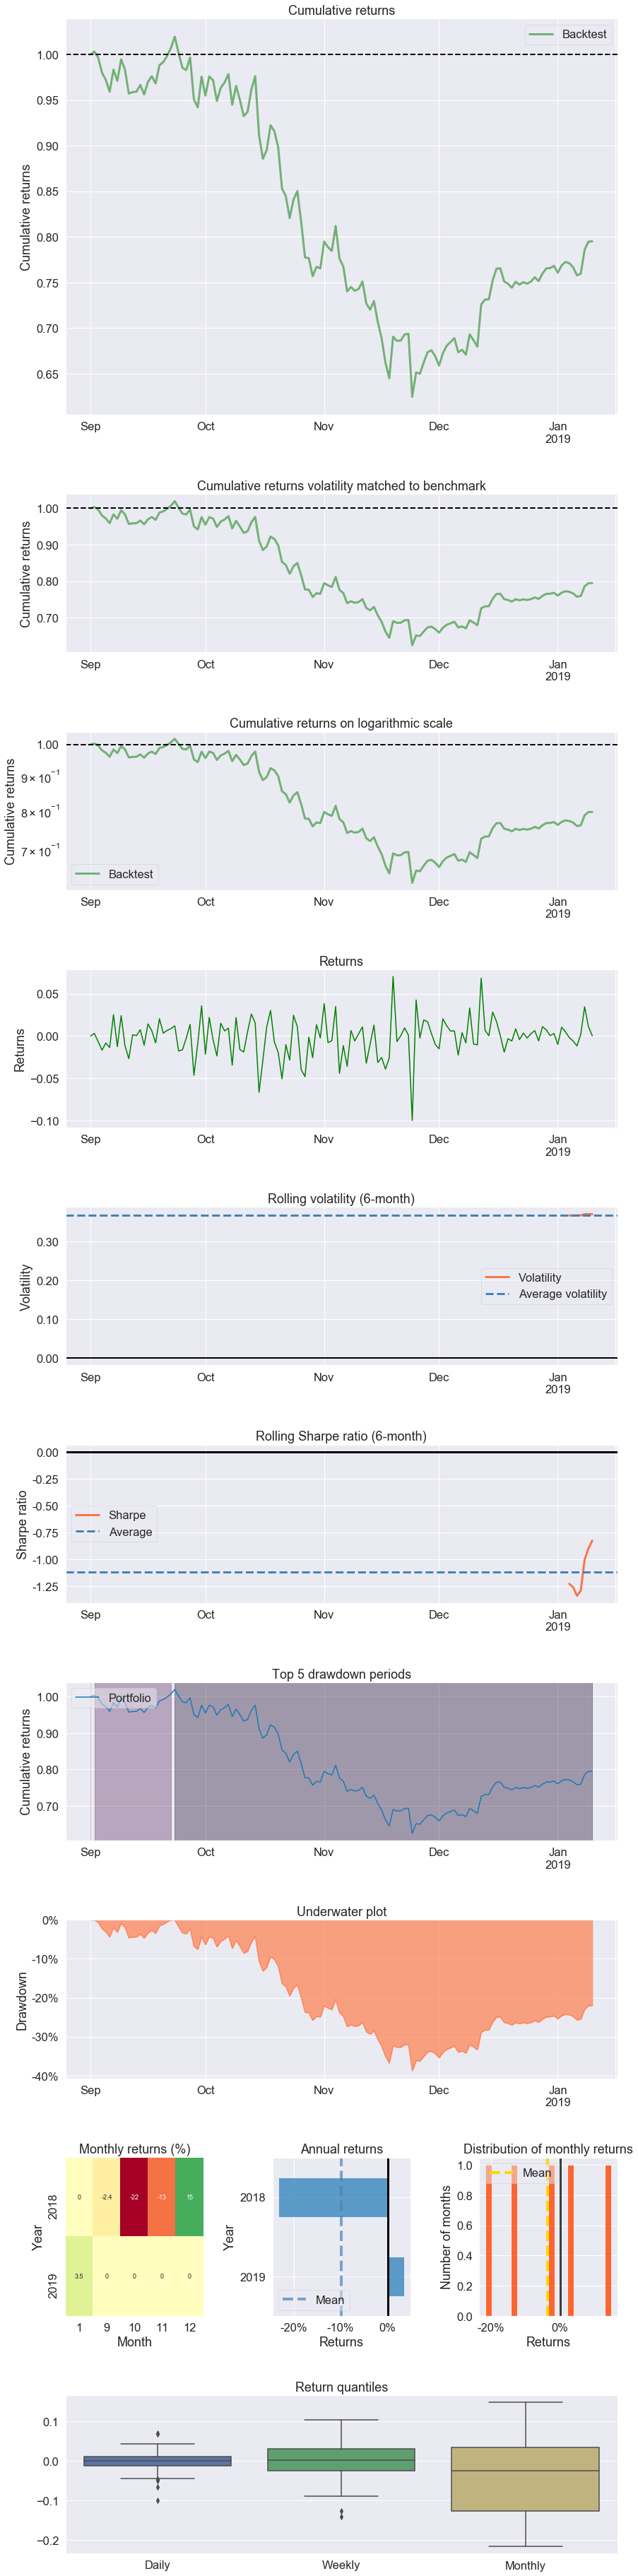

Stress Events,mean,min,max
New Normal,-0.15%,-9.96%,7.04%


AttributeError: 'NoneType' object has no attribute 'copy'

In [112]:
tmp=daily_pct_change[:16]
pf.create_full_tear_sheet(daily_pct_change)

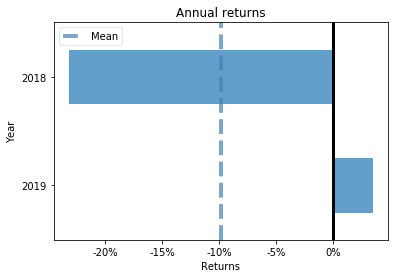

In [122]:
tmp=daily_pct_change[-10:]

pf.plot_annual_returns(daily_pct_change)

In [176]:
tmp
# pf.plot_returns(tmp)
tmp

2019-01-01 00:00:00+08:00   -0.009836
2019-01-02 00:00:00+08:00    0.010511
2019-01-03 00:00:00+08:00    0.005029
2019-01-04 00:00:00+08:00   -0.001820
2019-01-05 00:00:00+08:00   -0.005754
2019-01-06 00:00:00+08:00   -0.011575
2019-01-07 00:00:00+08:00    0.002377
2019-01-08 00:00:00+08:00    0.034642
2019-01-09 00:00:00+08:00    0.011235
2019-01-10 00:00:00+08:00    0.000387
Freq: D, dtype: float64

In [124]:
tmp

2019-01-01 00:00:00+08:00   -0.009836
2019-01-02 00:00:00+08:00    0.010511
2019-01-03 00:00:00+08:00    0.005029
2019-01-04 00:00:00+08:00   -0.001820
2019-01-05 00:00:00+08:00   -0.005754
2019-01-06 00:00:00+08:00   -0.011575
2019-01-07 00:00:00+08:00    0.002377
2019-01-08 00:00:00+08:00    0.034642
2019-01-09 00:00:00+08:00    0.011235
2019-01-10 00:00:00+08:00    0.000387
Freq: D, dtype: float64

In [161]:
rdf = pd.read_csv("~/utils/nowdone.ex_ledger.csv")

In [163]:
df=rdf.sort_values(by=['timestamp'], ascending=True)
df.iloc[0:3]

,_id,account_name,currency,exchange,ledger_id,amount,balance,created_at,details.instrument_id,details.order_id,details.product_id,timestamp,type
8836,ObjectId(5c88b588ce1ca6f7083fa47d),ZxieKalengo,ETH,okex,3500603363,1.000000,1.000000,2019-01-27T14:49:37.000Z,NaN,NaN,NaN,2019-01-27T14:49:37.000Z,transfer
14937,ObjectId(5c88bfd3ce1ca6f7084efefc),ZxieKalengo,BTC,okex,3500783782,0.002294,0.002294,2019-01-27T15:15:28.000Z,ETH-BTC,2.219451e+15,ETH-BTC,2019-01-27T15:15:28.000Z,trade
8835,ObjectId(5c88b588ce1ca6f7083fa46f),ZxieKalengo,ETH,okex,3500783783,-0.072000,0.928000,2019-01-27T15:15:28.000Z,ETH-BTC,2.219451e+15,ETH-BTC,2019-01-27T15:15:28.000Z,trade


In [141]:
# df[df["currency"].isin("ETH")]
df[df['currency'].isin(["ETH"])]["amount"].sum()
df[df['currency'].isin(["XRP"])]["amount"].sum()

69.6070000000002

In [180]:
df[df['currency'].isin(["XRP"])][["amount","timestamp"]]

a=df[["currency","amount","timestamp", "balance","details.order_id"]]


,currency,amount,timestamp,balance,details.order_id
8836,ETH,1.000000,2019-01-27T14:49:37.000Z,1.000000,NaN
14937,BTC,0.002294,2019-01-27T15:15:28.000Z,0.002294,2.219451e+15
8835,ETH,-0.072000,2019-01-27T15:15:28.000Z,0.928000,2.219451e+15
14936,BTC,0.006373,2019-01-27T15:15:28.000Z,0.008667,2.219451e+15
8834,ETH,-0.200000,2019-01-27T15:15:28.000Z,0.728000,2.219451e+15
14935,BTC,0.004079,2019-01-27T15:15:30.000Z,0.012746,2.219451e+15
8833,ETH,-0.128000,2019-01-27T15:15:30.000Z,0.600000,2.219451e+15
8831,ETH,-0.293899,2019-01-27T15:18:00.000Z,0.300000,2.219460e+15
8832,ETH,-0.006101,2019-01-27T15:18:00.000Z,0.593899,2.219460e+15
8830,ETH,-0.049999,2019-01-27T15:20:08.000Z,0.250001,2.219469e+15


In [169]:
a['timestamp'].values

array(['2019-01-27T14:49:37.000Z', '2019-01-27T15:15:28.000Z',
       '2019-01-27T15:15:28.000Z', ..., '2019-03-13T12:57:10.000Z',
       '2019-03-13T12:57:18.000Z', '2019-03-13T12:57:18.000Z'],
      dtype=object)

In [173]:
rdf2=pd.read_csv("~/utils/nowdone.ex_order.csv")

In [192]:
df2= rdf2.sort_values(by=["timestamp"], ascending=True)
df2.iloc[0:3]

,_id,account_name,exchange,order_id,client_oid,executed_value,filled_notional,filled_size,funds,instrument_id,notional,order_type,price,product_id,side,size,status,timestamp,type
6317,ObjectId(5c88b5cdce1ca6f70841061b),ZxieKalengo,okex,2219486969482240,NaN,0.001500,0.001500,0.72727,100000000.0,NEO-BTC,0.0015,0,0.000000,NEO-BTC,buy,0.000,filled,2019-01-27T15:24:43.000Z,market
3612,ObjectId(5c88b4dace1ca6f7083c4d7f),ZxieKalengo,okex,2323765011168256,NaN,0.499998,0.499998,200.56900,100000000.0,XRP-ETH,0.5000,0,0.000000,XRP-ETH,buy,0.000,filled,2019-02-15T01:24:00.000Z,market
3611,ObjectId(5c88b4dace1ca6f7083c4d77),ZxieKalengo,okex,2323812723468288,NaN,0.004005,0.004005,1.60700,NaN,XRP-ETH,NaN,0,0.002492,XRP-ETH,sell,1.607,filled,2019-02-15T01:36:08.000Z,limit


In [186]:
# a=a.set_index("dtails.order_id")
# df2=df2.set_index("order_id")

KeyError: 'dtails.order_id'

In [195]:
a


,currency,amount,balance
details.order_id,,,
NaN,ETH,1.000000,1.000000
2.219451e+15,BTC,0.002294,0.002294
2.219451e+15,ETH,-0.072000,0.928000
2.219451e+15,BTC,0.006373,0.008667
2.219451e+15,ETH,-0.200000,0.728000
2.219451e+15,BTC,0.004079,0.012746
2.219451e+15,ETH,-0.128000,0.600000
2.219460e+15,ETH,-0.293899,0.300000
2.219460e+15,ETH,-0.006101,0.593899


In [203]:
df2.set_index("order_id")

,_id,account_name,exchange,client_oid,executed_value,filled_notional,filled_size,funds,instrument_id,notional,order_type,price,product_id,side,size,status,timestamp,type
order_id,,,,,,,,,,,,,,,,,,
2219486969482240,ObjectId(5c88b5cdce1ca6f70841061b),ZxieKalengo,okex,NaN,0.001500,0.001500,0.72727,100000000.0,NEO-BTC,0.0015,0,0.000000,NEO-BTC,buy,0.000,filled,2019-01-27T15:24:43.000Z,market
2323765011168256,ObjectId(5c88b4dace1ca6f7083c4d7f),ZxieKalengo,okex,NaN,0.499998,0.499998,200.56900,100000000.0,XRP-ETH,0.5000,0,0.000000,XRP-ETH,buy,0.000,filled,2019-02-15T01:24:00.000Z,market
2323812723468288,ObjectId(5c88b4dace1ca6f7083c4d77),ZxieKalengo,okex,NaN,0.004005,0.004005,1.60700,NaN,XRP-ETH,NaN,0,0.002492,XRP-ETH,sell,1.607,filled,2019-02-15T01:36:08.000Z,limit
2323812791293952,ObjectId(5c88b4dace1ca6f7083c4d6b),ZxieKalengo,okex,NaN,0.004000,0.004000,1.60700,NaN,XRP-ETH,NaN,0,0.002489,XRP-ETH,buy,1.607,filled,2019-02-15T01:36:09.000Z,limit
2323934187489280,ObjectId(5c88b4dace1ca6f7083c4d65),ZxieKalengo,okex,NaN,0.004005,0.004005,1.60400,NaN,XRP-ETH,NaN,0,0.002497,XRP-ETH,sell,1.604,filled,2019-02-15T02:07:02.000Z,limit
2323934254538752,ObjectId(5c88b4dace1ca6f7083c4d55),ZxieKalengo,okex,NaN,0.004000,0.004000,1.60400,NaN,XRP-ETH,NaN,0,0.002494,XRP-ETH,buy,1.604,filled,2019-02-15T02:07:03.000Z,limit
2323958321653760,ObjectId(5c88b4dace1ca6f7083c4d4a),ZxieKalengo,okex,NaN,0.004004,0.004004,1.60400,NaN,XRP-ETH,NaN,0,0.002496,XRP-ETH,sell,1.604,filled,2019-02-15T02:13:10.000Z,limit
2323958388824064,ObjectId(5c88b4dace1ca6f7083c4d3f),ZxieKalengo,okex,NaN,0.004000,0.004000,1.60400,NaN,XRP-ETH,NaN,0,0.002494,XRP-ETH,buy,1.604,filled,2019-02-15T02:13:11.000Z,limit
2324019356308480,ObjectId(5c88b4dace1ca6f7083c4d36),ZxieKalengo,okex,NaN,0.004000,0.004000,1.60700,NaN,XRP-ETH,NaN,0,0.002489,XRP-ETH,buy,1.607,filled,2019-02-15T02:28:41.000Z,limit


In [208]:
a

,currency,amount,balance
details.order_id,,,
NaN,ETH,1.000000,1.000000
2.219451e+15,BTC,0.002294,0.002294
2.219451e+15,ETH,-0.072000,0.928000
2.219451e+15,BTC,0.006373,0.008667
2.219451e+15,ETH,-0.200000,0.728000
2.219451e+15,BTC,0.004079,0.012746
2.219451e+15,ETH,-0.128000,0.600000
2.219460e+15,ETH,-0.293899,0.300000
2.219460e+15,ETH,-0.006101,0.593899


,currency,amount,balance,_id,account_name,exchange,client_oid,executed_value,filled_notional,filled_size,...,instrument_id,notional,order_type,price,product_id,side,size,status,timestamp,type
2.219451e+15,BTC,0.002294,0.002294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.219451e+15,ETH,-0.072000,0.928000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.219451e+15,BTC,0.006373,0.008667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.219451e+15,ETH,-0.200000,0.728000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.219451e+15,BTC,0.004079,0.012746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.219451e+15,ETH,-0.128000,0.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.219460e+15,ETH,-0.293899,0.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.219460e+15,ETH,-0.006101,0.593899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.219469e+15,ETH,-0.049999,0.250001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.219472e+15,ETH,-0.050000,0.200001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [213]:
df2.set_index('order_id').join(a)

,_id,account_name,exchange,client_oid,executed_value,filled_notional,filled_size,funds,instrument_id,notional,...,price,product_id,side,size,status,timestamp,type,currency,amount,balance
2219486969482240,ObjectId(5c88b5cdce1ca6f70841061b),ZxieKalengo,okex,NaN,0.001500,0.001500,0.72727,100000000.0,NEO-BTC,0.0015,...,0.000000,NEO-BTC,buy,0.000,filled,2019-01-27T15:24:43.000Z,market,BTC,-0.000001,0.007745
2219486969482240,ObjectId(5c88b5cdce1ca6f70841061b),ZxieKalengo,okex,NaN,0.001500,0.001500,0.72727,100000000.0,NEO-BTC,0.0015,...,0.000000,NEO-BTC,buy,0.000,filled,2019-01-27T15:24:43.000Z,market,BTC,-0.001499,0.006246
2219486969482240,ObjectId(5c88b5cdce1ca6f70841061b),ZxieKalengo,okex,NaN,0.001500,0.001500,0.72727,100000000.0,NEO-BTC,0.0015,...,0.000000,NEO-BTC,buy,0.000,filled,2019-01-27T15:24:43.000Z,market,NEO,0.725540,0.726179
2219486969482240,ObjectId(5c88b5cdce1ca6f70841061b),ZxieKalengo,okex,NaN,0.001500,0.001500,0.72727,100000000.0,NEO-BTC,0.0015,...,0.000000,NEO-BTC,buy,0.000,filled,2019-01-27T15:24:43.000Z,market,NEO,0.000639,0.000639
2323765011168256,ObjectId(5c88b4dace1ca6f7083c4d7f),ZxieKalengo,okex,NaN,0.499998,0.499998,200.56900,100000000.0,XRP-ETH,0.5000,...,0.000000,XRP-ETH,buy,0.000,filled,2019-02-15T01:24:00.000Z,market,XRP,200.569000,200.569000
2323765011168256,ObjectId(5c88b4dace1ca6f7083c4d7f),ZxieKalengo,okex,NaN,0.499998,0.499998,200.56900,100000000.0,XRP-ETH,0.5000,...,0.000000,XRP-ETH,buy,0.000,filled,2019-02-15T01:24:00.000Z,market,ETH,-0.499998,1.406411
2323812723468288,ObjectId(5c88b4dace1ca6f7083c4d77),ZxieKalengo,okex,NaN,0.004005,0.004005,1.60700,NaN,XRP-ETH,NaN,...,0.002492,XRP-ETH,sell,1.607,filled,2019-02-15T01:36:08.000Z,limit,XRP,-1.607000,198.962000
2323812723468288,ObjectId(5c88b4dace1ca6f7083c4d77),ZxieKalengo,okex,NaN,0.004005,0.004005,1.60700,NaN,XRP-ETH,NaN,...,0.002492,XRP-ETH,sell,1.607,filled,2019-02-15T01:36:08.000Z,limit,ETH,0.004005,1.410416
2323812791293952,ObjectId(5c88b4dace1ca6f7083c4d6b),ZxieKalengo,okex,NaN,0.004000,0.004000,1.60700,NaN,XRP-ETH,NaN,...,0.002489,XRP-ETH,buy,1.607,filled,2019-02-15T01:36:09.000Z,limit,ETH,-0.004000,1.402426
2323812791293952,ObjectId(5c88b4dace1ca6f7083c4d6b),ZxieKalengo,okex,NaN,0.004000,0.004000,1.60700,NaN,XRP-ETH,NaN,...,0.002489,XRP-ETH,buy,1.607,filled,2019-02-15T01:36:09.000Z,limit,XRP,1.607000,202.176000


In [216]:
df2["type"].unique()

array(['market', 'limit'], dtype=object)

In [217]:
rdf['type'].unique()

array(['trade', 'transfer'], dtype=object)

In [221]:
daily_returns= [-0.012143,0.045350,0.030957,0.004902]
index = pd.date_range('9/1/2018', periods=len(daily_returns), freq='1D',tz='Asia/Hong_Kong')
d=pd.Series(daily_returns, index=index)

In [222]:
d

2018-09-01 00:00:00+08:00   -0.012143
2018-09-02 00:00:00+08:00    0.045350
2018-09-03 00:00:00+08:00    0.030957
2018-09-04 00:00:00+08:00    0.004902
Freq: D, dtype: float64

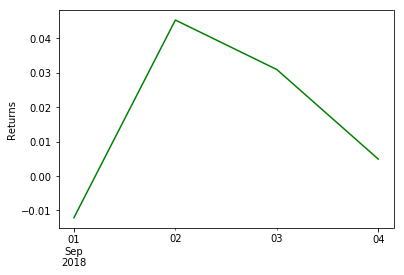

In [223]:
pf.plot_returns(d)

In [249]:
pos_data = [ 
            [13939.38, -14012.9930, 711.5585],
            [14492.6300 , -14624.8700 ,27.1821], 
            [-13853.2800 ,13653.6400,-43.6375],
            [-1223.2800 ,15553.6400,-23.6375]
           ]


In [250]:

pos = pd.DataFrame(pos_data, columns=['AAPL', 'MS', 'cash'], index=index)
pos

,AAPL,MS,cash
2018-09-01 00:00:00+08:00,13939.38,-14012.993,711.5585
2018-09-02 00:00:00+08:00,14492.63,-14624.870,27.1821
2018-09-03 00:00:00+08:00,-13853.28,13653.640,-43.6375
2018-09-04 00:00:00+08:00,-1223.28,15553.640,-23.6375


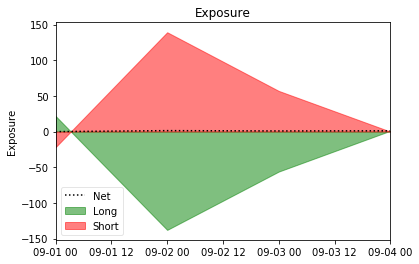

In [251]:
pf.plot_exposures(d, pos)

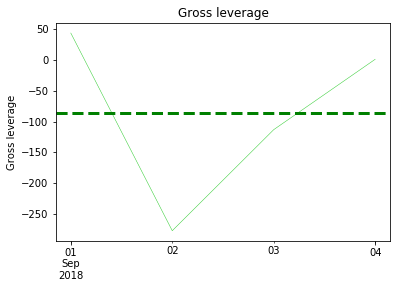

In [254]:
pf.plot_gross_leverage(returns=d, positions=pos)

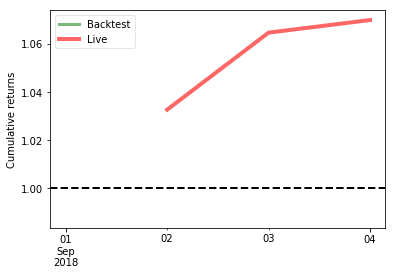

In [270]:
from datetime import datetime, timezone, timedelta
tz_utc_8 = timezone(timedelta(hours=8))
st = datetime(2018,9,2, tzinfo=tz_utc_8)
pf.plot_rolling_returns(returns=d, live_start_date=st)

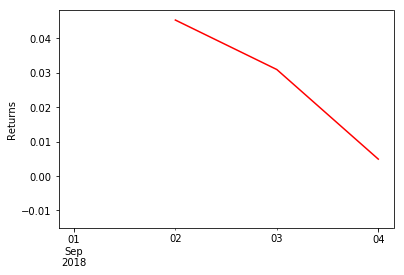

In [271]:
pf.plot_returns(returns=d, live_start_date=st)